In [3]:
from workflow import AzureArchitectureWorkflow

workflow = AzureArchitectureWorkflow()
csv_path = "data/azure-service-recommendations.csv"
csv_data = workflow.read_csv_file(csv_path)
service_recommendation = workflow.get_service_recommendation_content(csv_data, "API Management")
service_recommendation[:100]

'Architecture best practices for Azure API Management\nArticle · 04/17/2025\nAzure API Management is a '

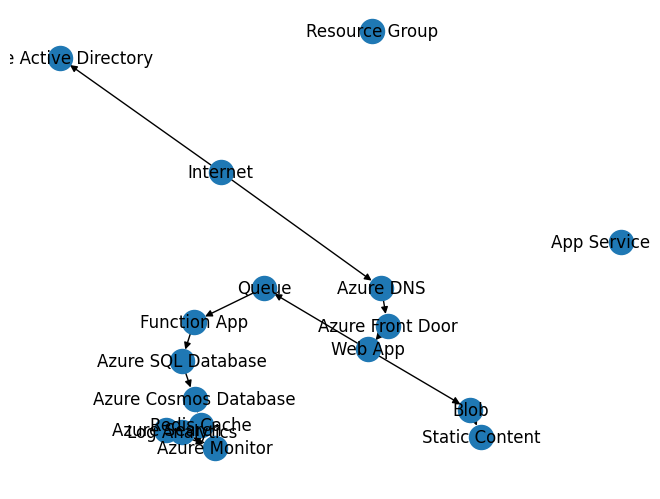

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = [
    {"id": "Azure Active Directory", "type": "azure", "label": "Azure Active Directory"},
    {"id": "Internet", "type": "custom", "label": "Internet"},
    {"id": "Azure DNS", "type": "azure", "label": "Azure DNS"},
    {"id": "Azure Front Door", "type": "azure", "label": "Azure Front Door WAF CDN"},
    {"id": "App Service Plan", "type": "azure", "label": "Azure App Service Plan"},
    {"id": "Web App", "type": "azure", "label": "Azure Web App"},
    {"id": "Queue", "type": "azure", "label": "Azure Queue"},
    {"id": "Function App", "type": "azure", "label": "Azure Function App"},
    {"id": "Blob", "type": "azure", "label": "Azure Blob Storage"},
    {"id": "Static Content", "type": "custom", "label": "Static Content"},
    {"id": "Azure SQL Database", "type": "azure", "label": "Azure SQL Database"},
    {"id": "Azure Cosmos Database", "type": "azure", "label": "Azure Cosmos Database"},
    {"id": "Redis Cache", "type": "azure", "label": "Azure Redis Cache"},
    {"id": "Azure Search", "type": "azure", "label": "Azure Search"},
    {"id": "Azure Monitor", "type": "azure", "label": "Azure Monitor"},
    {"id": "Log Analytics", "type": "azure", "label": "Azure Log Analytics"},
    {"id": "Resource Group", "type": "azure", "label": "Azure Resource Group"}
  ]

edges = [
  {"source": "Internet", "target": "Azure Active Directory", "label": "Authentication"},
  {"source": "Internet", "target": "Azure DNS", "label": "DNS Lookup"},
  {"source": "Azure DNS", "target": "Azure Front Door", "label": "Resource Group"},
  {"source": "Azure Front Door", "target": "Web App", "label": "Secure and optimized content delivery"},
  {"source": "Web App", "target": "Queue", "label": "Message Queue"},
  {"source": "Queue", "target": "Function App", "label": "Event Processing"},
  {"source": "Web App", "target": "Blob", "label": "Static Content"},
  {"source": "Blob", "target": "Static Content", "label": "Storage"},
  {"source": "Function App", "target": "Azure SQL Database", "label": "Data Processing"},
  {"source": "Azure SQL Database", "target": "Azure Cosmos Database", "label": "Data Replication"},
  {"source": "Azure Cosmos Database", "target": "Redis Cache", "label": "Caching"},
  {"source": "Redis Cache", "target": "Azure Search", "label": "Search Indexing"},
  {"source": "Azure Search", "target": "Azure Monitor", "label": "Metric Data"},
  {"source": "Azure Monitor", "target": "Log Analytics", "label": "Audit & Diagnostic Logs"}
]

G = nx.DiGraph()
G.add_nodes_from((node["id"], {"type": node["type"], "label": node["label"]}) for node in nodes)
G.add_edges_from((edge["source"], edge["target"], {"label": edge["label"]}) for edge in edges)
# Draw the architecture graph
nx.draw(G, with_labels=True)
plt.show()